# Imports


In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack

## Constants

In [68]:

amplitude = 10000
sim_width = 4500e-6
pixel_size = 1e-6 
n_slices = 3000

lens = Lens.Lens(
    diameter=sim_width,
    height=70e-6,
    exponent=2.0,
    medium=Lens.Medium(2.348)
)


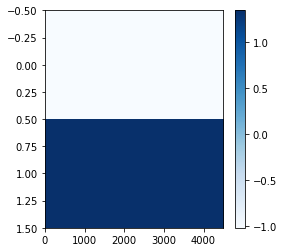

In [71]:
z_step = 0.01
# z_step = 0.1
rounding = 0
medium = Lens.Medium(1.0)
lens.generate_profile(pixel_size=pixel_size)
# plt.plot(lens.profile)
# plt.show()

phase_diff_profile = Simulation.generate_differential_refractive_index_profile(
    lens=lens, z_resolution=z_step, previous_slice=len(lens.profile) * [1.33], output_medium=medium, pixel_size=pixel_size
)

size = 4

plt.figure(figsize=(size, size))
plt.imshow(phase_diff_profile, aspect="auto", interpolation="none", cmap="Blues")
plt.colorbar()
plt.show()

c:\Users\David  Dierickx\.conda\envs\lens_simulation\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


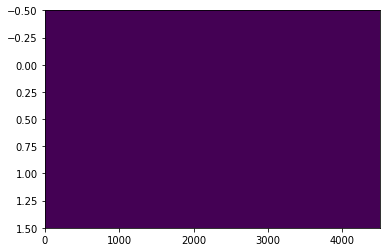

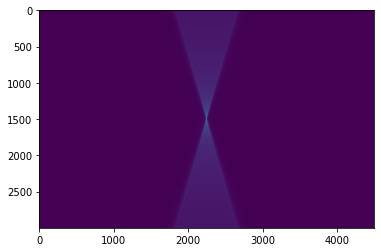

In [73]:

freq_array = Simulation.generate_squared_frequency_array(n_pixels=len(lens.profile), pixel_size=pixel_size)

wavefronts = np.zeros(shape=phase_diff_profile.shape)
outputs = np.zeros(shape=phase_diff_profile.shape)


for i, slice in enumerate(phase_diff_profile):
    delta = slice * z_step
    phase = (2 * np.pi * delta / medium.wavelength_medium ) % (2 * np.pi)

    if i == 0:
        wavefront = 10000 * np.exp(1j*phase)
    else:
        current_wavefront = 1 * np.exp(1j * phase)
        wavefront = current_wavefront * wavefronts[i-1]

    propagator = np.exp(1j * medium.wave_number * z_step * (i))  * np.exp( (-1j * 2 * np.pi ** 2 * (z_step * (i)) * freq_array) / medium.wave_number)
    propagation = fftpack.ifft(propagator * wavefront)

    output = np.sqrt(propagation.real**2 + propagation.imag**2)
    wavefronts[i] = propagation
    outputs[i] = output

plt.imshow(outputs, aspect='auto')
plt.show()

sim = np.ones(shape=(n_slices, len(lens.profile)))

equivalent_focal_distance = Simulation.calculate_equivalent_focal_distance(lens, medium)
start_distance = 0.8 * equivalent_focal_distance  # 25e-3
finish_distance = 1.2 * equivalent_focal_distance  # 28e-3

#####

delta = (lens.medium.refractive_index - medium.refractive_index) * lens.profile
phase = (2 * np.pi * delta / medium.wavelength_medium) % (2 * np.pi)
wavefront = 10000 * np.exp(1j * phase)

# print("Wavefront shape: ", wavefront.shape)
wavefront = fftpack.fft(wavefront)


#####
distances = np.linspace(start_distance, finish_distance, n_slices)
for i, z in enumerate(distances):
    # wavefront = fftpack.fft(wavefronts[-1])
    # wavefront = wavefronts[-1]
    prop = np.exp(1j * medium.wave_number * z)  * np.exp( (-1j * 2 * np.pi ** 2 * z * freq_array) / medium.wave_number)
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop * wavefront)

    output = np.sqrt(propagation.real**2 + propagation.imag**2)

    sim[i] = output
    # print(f'Slice: {i} complete')

plt.imshow(sim, aspect='auto')
plt.show()



CENTRE_PX:  2250
n_pixels_in_sim:  4501  pixel_size:  1e-06
Prop Size:  4501


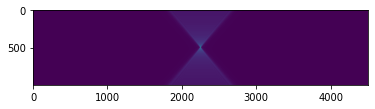

In [34]:
from lens_simulation import Lens, Simulation

import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack


A = 10000

from lens_simulation import Simulation


# n_pixels need to be consistent

sim_width = 4500e-6
pixel_size = 1e-6  # 450e-6
# n_pixels = int(sim_width / pixel_size)

# # n_pixels must be odd (symmetry).
# if n_pixels % 2 == 0:
#     n_pixels += 1

# print(n_pixels)

lens = Lens.Lens(
    diameter=sim_width, height=70e-6, exponent=2.0, medium=Lens.Medium(2.348)
)
profile = lens.generate_profile(pixel_size)


# pixels size is defined by the sim
# define a simulation width (includes padding)
# TODO: minimum padding?
# escape path: 10%
# padding: 30%
# pad the sides of the profile to match the sim width

centre_px = (len(profile) - 1) // 2
print("CENTRE_PX: ", centre_px)

medium = Lens.Medium(refractive_index=1.0)

print("n_pixels_in_sim: ", len(profile), " pixel_size: ", pixel_size)

freq_array = Simulation.generate_squared_frequency_array(
    n_pixels=len(profile), pixel_size=pixel_size
)

delta = (lens.medium.refractive_index - medium.refractive_index) * profile
phase = (2 * np.pi * delta / medium.wavelength_medium) % (2 * np.pi)
wavefront = A * np.exp(1j * phase)

# print("Wavefront shape: ", wavefront.shape)
wavefront = fftpack.fft(wavefront)

equivalent_focal_distance = Simulation.calculate_equivalent_focal_distance(lens, medium)
start_distance = 0.8 * equivalent_focal_distance  # 25e-3
finish_distance = 1.2 * equivalent_focal_distance  # 28e-3

n_slices = 1000
sim = np.ones(shape=(n_slices, len(profile)))
distances = np.linspace(start_distance, finish_distance, n_slices)
for i, z in enumerate(distances):

    prop = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * freq_array) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop * wavefront)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim[i] = output

print("Prop Size: ", len(prop))

plt.imshow(sim)
plt.show()

# fig = utils.plot_interactive_simulation(sim)
# fig.show()
